In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [44]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('vcb.csv')

In [45]:
# Xử lý dữ liệu
prices = data['Price']

In [46]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [47]:
scaled_prices

array([[0.08754242],
       [0.08647225],
       [0.091809  ],
       ...,
       [0.67895011],
       [0.68880691],
       [0.65782841]])

In [48]:
#RATIO 73

In [49]:
# Chia dữ liệu thành tập train test
train_size = int(len(scaled_prices) * 0.8)
test_size = int(len(scaled_prices) * 0.2)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [50]:
test_data

array([[0.37338947],
       [0.40155174],
       [0.43675458],
       [0.4592844 ],
       [0.43393835],
       [0.45365194],
       [0.45646817],
       [0.47477365],
       [0.45787628],
       [0.45787628],
       [0.48463044],
       [0.48603855],
       [0.50997648],
       [0.50856837],
       [0.53532253],
       [0.55644423],
       [0.53673064],
       [0.52828196],
       [0.5113846 ],
       [0.5113846 ],
       [0.52264951],
       [0.5423631 ],
       [0.52546573],
       [0.5634848 ],
       [0.55785235],
       [0.55644423],
       [0.55785235],
       [0.57756593],
       [0.57756593],
       [0.55644423],
       [0.53532253],
       [0.53532253],
       [0.52828196],
       [0.52969007],
       [0.58038216],
       [0.62403368],
       [0.64093104],
       [0.62684991],
       [0.69725559],
       [0.69725559],
       [0.62684991],
       [0.60572821],
       [0.5846065 ],
       [0.58883084],
       [0.59023896],
       [0.60150387],
       [0.60995255],
       [0.619

In [51]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)


In [52]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [53]:
X_train.shape

(1160, 30, 1)

In [54]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [55]:
# Tạo mô hình DNN
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_steps,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [56]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
19/19 [==============================] - 1s 889us/step - loss: 0.0403
Epoch 2/100
19/19 [==============================] - 0s 834us/step - loss: 0.0044
Epoch 3/100
19/19 [==============================] - 0s 834us/step - loss: 0.0017
Epoch 4/100
19/19 [==============================] - 0s 889us/step - loss: 0.0012
Epoch 5/100
19/19 [==============================] - 0s 833us/step - loss: 0.0010
Epoch 6/100
19/19 [==============================] - 0s 834us/step - loss: 9.5001e-04
Epoch 7/100
19/19 [==============================] - 0s 778us/step - loss: 8.4335e-04
Epoch 8/100
19/19 [==============================] - 0s 778us/step - loss: 7.2124e-04
Epoch 9/100
19/19 [==============================] - 0s 834us/step - loss: 7.3206e-04
Epoch 10/100
19/19 [==============================] - 0s 833us/step - loss: 6.4256e-04
Epoch 11/100
19/19 [==============================] - 0s 834us/step - loss: 5.7744e-04
Epoch 12/100
19/19 [==============================] - 0s 889us/step - lo

In [57]:
data.index


RangeIndex(start=0, stop=1488, step=1)

In [58]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

9/9 [==============================] - 0s 750us/step
[[1489]
 [1490]
 [1491]
 [1492]
 [1493]
 [1494]
 [1495]
 [1496]
 [1497]
 [1498]
 [1499]
 [1500]
 [1501]
 [1502]
 [1503]
 [1504]
 [1505]
 [1506]
 [1507]
 [1508]
 [1509]
 [1510]
 [1511]
 [1512]
 [1513]
 [1514]
 [1515]
 [1516]
 [1517]
 [1518]]
1/1 [==============================] - 0s 14ms/step
[88461.664 89192.69  89139.266 89498.8   89362.99  88725.555 87096.75
 85788.76  86505.82  86903.75  87622.336 86244.85  85971.03  87149.27
 87273.91  85864.2   85903.15  85870.75  86382.7   85886.11  84858.79
 85085.78  86397.37  85657.16  85664.3   85127.07  85394.836 84810.71
 84310.99  84076.664]


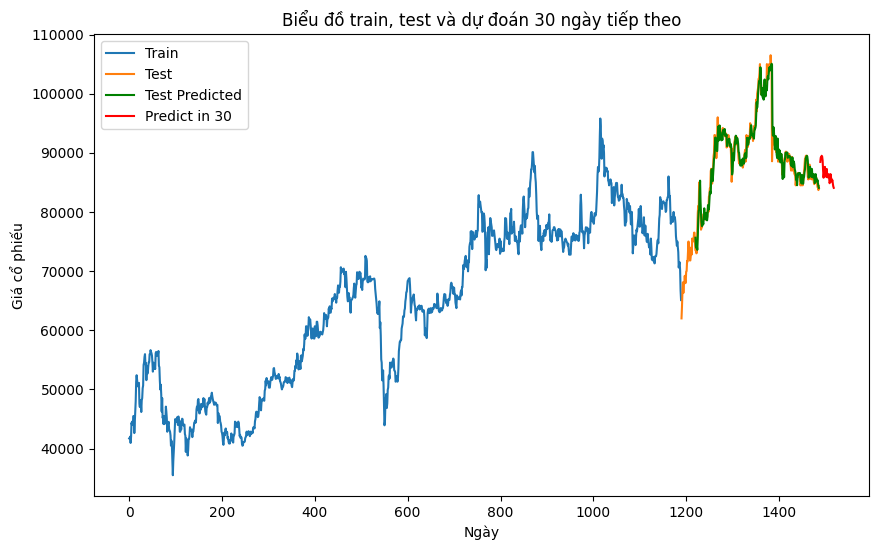

In [59]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Predict in 30')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [60]:
y_test_pred

array([[ 75641.805],
       [ 74149.53 ],
       [ 73885.06 ],
       [ 74318.73 ],
       [ 73591.5  ],
       [ 75709.61 ],
       [ 78739.08 ],
       [ 80203.89 ],
       [ 80324.52 ],
       [ 83555.56 ],
       [ 85288.25 ],
       [ 81669.484],
       [ 79731.234],
       [ 78273.84 ],
       [ 77600.71 ],
       [ 77733.13 ],
       [ 78216.14 ],
       [ 77931.37 ],
       [ 79074.11 ],
       [ 80609.664],
       [ 79353.76 ],
       [ 79129.8  ],
       [ 78751.375],
       [ 79454.47 ],
       [ 79850.35 ],
       [ 78580.69 ],
       [ 79182.55 ],
       [ 81156.25 ],
       [ 81128.05 ],
       [ 80422.04 ],
       [ 81800.445],
       [ 83344.484],
       [ 83472.305],
       [ 83138.59 ],
       [ 86355.69 ],
       [ 87225.02 ],
       [ 85992.39 ],
       [ 85195.31 ],
       [ 86261.56 ],
       [ 87635.76 ],
       [ 88943.94 ],
       [ 89330.83 ],
       [ 91178.48 ],
       [ 92578.914],
       [ 91092.88 ],
       [ 91670.76 ],
       [ 90320.14 ],
       [ 9029

In [61]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)

y_test1 = scaler.inverse_transform(y_test)


# Tính MAE cho testing
mae_test = mean_absolute_error(y_test1, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test1, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test1, y_test_predicted, squared=False)

# Tính MSLE cho testing
msle_test = mean_squared_log_error(y_test1, y_test_predicted, squared=False)




9/9 [==============================] - 0s 750us/step


In [62]:
y_test1

array([[ 73500.],
       [ 73500.],
       [ 73000.],
       [ 73100.],
       [ 76700.],
       [ 79800.],
       [ 81000.],
       [ 80000.],
       [ 85000.],
       [ 85000.],
       [ 80000.],
       [ 78500.],
       [ 77000.],
       [ 77300.],
       [ 77400.],
       [ 78200.],
       [ 78800.],
       [ 79500.],
       [ 79700.],
       [ 79200.],
       [ 79000.],
       [ 78700.],
       [ 79300.],
       [ 79100.],
       [ 78900.],
       [ 79100.],
       [ 80000.],
       [ 80700.],
       [ 80000.],
       [ 82600.],
       [ 82800.],
       [ 84000.],
       [ 84000.],
       [ 86900.],
       [ 87300.],
       [ 85100.],
       [ 84800.],
       [ 85800.],
       [ 87300.],
       [ 89400.],
       [ 90000.],
       [ 93000.],
       [ 93000.],
       [ 89900.],
       [ 91900.],
       [ 89100.],
       [ 90600.],
       [ 93000.],
       [ 96000.],
       [ 92000.],
       [ 94200.],
       [ 93000.],
       [ 94500.],
       [ 93500.],
       [ 92500.],
       [ 9

In [63]:
mape_test *= 100


print('---------TEST----------')
print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))
print("MSLE:", round(msle_test,3))
print('-------------------')


---------TEST----------
MAPE: 1.29
MAE: 1151.42
RMSE: 1763.879
MSLE: 0.019
-------------------
